In [30]:
import pandas as pd
import numpy as np

# Reading the data in pandas dataframe
data = pd.read_csv("/content/stock_list.csv")

# Information of the dataframe
data.info()

data['SecuritiesCode'].value_counts()
data['SecuritiesCode'].describe()

data['Name'].describe()
data['Name'].value_counts()

data['Section/Products'].describe()
data['Section/Products'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4417 entries, 0 to 4416
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SecuritiesCode          4417 non-null   int64  
 1   EffectiveDate           4417 non-null   int64  
 2   Name                    4417 non-null   object 
 3   Section/Products        4417 non-null   object 
 4   NewMarketSegment        3772 non-null   object 
 5   33SectorCode            4417 non-null   object 
 6   33SectorName            4417 non-null   object 
 7   17SectorCode            4417 non-null   object 
 8   17SectorName            4417 non-null   object 
 9   NewIndexSeriesSizeCode  4417 non-null   object 
 10  NewIndexSeriesSize      4417 non-null   object 
 11  TradeDate               4121 non-null   float64
 12  Close                   4121 non-null   float64
 13  IssuedShares            4121 non-null   float64
 14  MarketCapitalization    4121 non-null   

First Section (Domestic)                                       2327
JASDAQ(Standard / Domestic)                                     726
Second Section(Domestic)                                        530
Mothers (Domestic)                                              439
ETFs/ ETNs                                                      277
REIT, Venture Funds, Country Funds and Infrastructure Funds      68
JASDAQ(Growth/Domestic)                                          41
First Section (Foreign)                                           4
Mothers (Foreign)                                                 3
JASDAQ(Standard / Foreign)                                        1
Second Section(Foreign)                                           1
Name: Section/Products, dtype: int64

In [31]:

data['17SectorCode'].describe()
data['17SectorCode'].value_counts()

data['NewIndexSeriesSizeCode'].describe()
data['NewIndexSeriesSizeCode'].value_counts()

data['TradeDate'].describe()
data['TradeDate'].value_counts()

20211230.0    4049
20211229.0      37
20211228.0      18
20211227.0       6
20211220.0       3
20211221.0       2
20211222.0       2
20211223.0       2
20211216.0       1
20211224.0       1
Name: TradeDate, dtype: int64

In [32]:
data['NewMarketSegment'].describe()
data['NewMarketSegment'].value_counts()

data['33SectorCode'].describe()
data['33SectorCode'].value_counts()

data['33SectorName'].describe()
data['33SectorName'].value_counts()

Information & Communication                      551
Services                                         521
-                                                500
Retail Trade                                     359
Wholesale Trade                                  320
Electric Appliances                              255
Machinery                                        230
Chemicals                                        218
Construction                                     170
Real Estate                                      143
Foods                                            125
Other Products                                   116
Transportation Equipment                          95
Banks                                             93
Metal Products                                    90
Pharmaceutical                                    77
Land Transportation                               62
Glass and Ceramics Products                       56
Textiles and Apparels                         

In [33]:
data['Close'].describe()
data['Close'].value_counts()

data['IssuedShares'].describe()
data['IssuedShares'].value_counts()

data['MarketCapitalization'].describe()
data['MarketCapitalization'].value_counts()

3.365911e+10    1
2.858980e+10    1
2.926623e+09    1
5.080396e+09    1
7.468370e+09    1
               ..
3.273269e+09    1
1.112000e+10    1
3.634259e+09    1
4.465366e+11    1
6.623362e+10    1
Name: MarketCapitalization, Length: 4121, dtype: int64

In [34]:
import keras
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import pandas as pd 
import pandas_datareader.data as web
import datetime
import numpy as np 
from matplotlib import style

# ignore warnings 
import warnings
warnings.filterwarnings('ignore')

style.use('ggplot')
df = pd.read_csv("/content/stock_prices.csv")

df = df.sort_values('Date')

df.reset_index(inplace=True)
df.set_index("Date", inplace=True)
df.tail()

,index,RowId,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
Date,,,,,,,,,,,,
2021-12-03,2331189,20211203_4490,4490,5330.0,5520.0,5240.0,5520.0,85700,1.0,NaN,False,0.094961
2021-12-03,2331188,20211203_4488,4488,6400.0,6700.0,6300.0,6700.0,52200,1.0,NaN,False,-0.011688
2021-12-03,2331187,20211203_4485,4485,10580.0,10750.0,9780.0,10230.0,572400,1.0,NaN,False,0.044966
2021-12-03,2331200,20211203_4523,4523,6800.0,6945.0,6762.0,6945.0,1134600,1.0,NaN,False,0.004962
2021-12-03,2332530,20211203_9997,9997,690.0,711.0,686.0,696.0,381100,1.0,NaN,False,0.018414


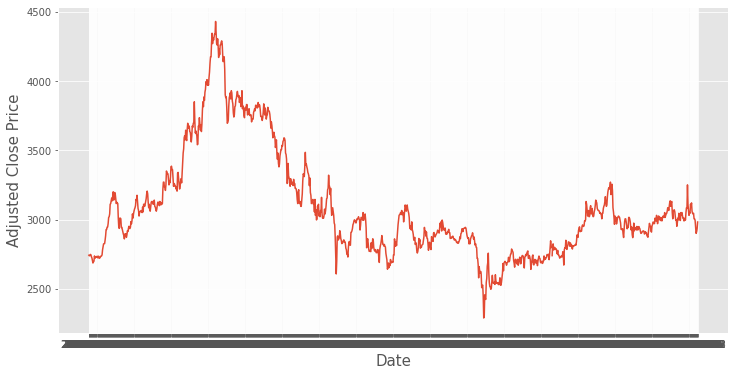

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
new_df = df.query("SecuritiesCode == 1301")
plt.figure(figsize = (12,6))
plt.plot(new_df['Close'])
plt.xlabel('Date',fontsize=15)
plt.ylabel('Adjusted Close Price',fontsize=15)
plt.show()

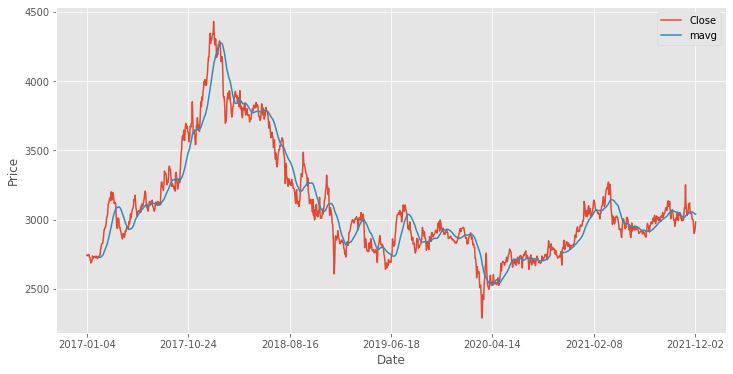

In [36]:
## plotting rolling mean

close_px = new_df['Close']
mavg = close_px.rolling(window=25).mean()

plt.figure(figsize = (12,6))
close_px.plot()
mavg.plot(label='mavg')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

In [42]:
import matplotlib.dates as mdates
## converting dates into integer for training

dates_df = new_df.copy()
dates_df = dates_df.reset_index()

# Store the original dates for plotting the predicitons
org_dates = dates_df['Date']

# convert to ints
dates_df['Date'] = dates_df['Date']

# dates_df.tail()